<a href="https://colab.research.google.com/github/SalmenzarZV/scrapy_faces_sergio/blob/main/scrapy_faces_sergio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación del proyecto

In [1]:
# instalación de Scrapy
!pip install Scrapy
# creación del proyecto
!scrapy startproject project_faces scrapy
# creación del spider
!cd scrapy/project_faces && scrapy genspider FindFaces https://generated.photos/faces

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.9/272.9 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 KB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 KB 11.7 MB/s eta 0:00:00
New Scrapy project 'project_faces', using template directory '/usr/local/lib/python3.9/dist-packages/scrapy/templates/project', created in:
    /content/scrapy

You can start your first spider with:
    cd scrapy
    scrapy genspider example example.com
Created spider 'FindFaces' using template 'basic' in module:
  project_faces.spiders.FindFaces


## Edición de path/to/settings.py



*   USER_AGENT
*   ROBOTSTXT_OBEY
*   DEFAULT_REQUEST_HEADERS



In [2]:
%%writefile scrapy/project_faces/settings.py

BOT_NAME = 'project_faces'

SPIDER_MODULES = ['project_faces.spiders']
NEWSPIDER_MODULE = 'project_faces.spiders'

USER_AGENT = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'

ROBOTSTXT_OBEY = False

DEFAULT_REQUEST_HEADERS = {
   'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
   'Accept-Language': 'es',
}

REQUEST_FINGERPRINTER_IMPLEMENTATION = '2.7'
TWISTED_REACTOR = 'twisted.internet.asyncioreactor.AsyncioSelectorReactor'

Overwriting scrapy/project_faces/settings.py


## Ejecución del spider

### No se debe ejecutar hasta que se haya implementado el spider.

In [9]:
!cd scrapy/project_faces && scrapy crawl FindFaces

2023-03-25 18:01:46 [scrapy.utils.log] INFO: Scrapy 2.8.0 started (bot: project_faces)
2023-03-25 18:01:46 [scrapy.utils.log] INFO: Versions: lxml 4.9.2.0, libxml2 2.9.14, cssselect 1.2.0, parsel 1.7.0, w3lib 2.1.1, Twisted 22.10.0, Python 3.9.16 (main, Dec  7 2022, 01:11:51) - [GCC 9.4.0], pyOpenSSL 23.1.0 (OpenSSL 3.0.8 7 Feb 2023), cryptography 39.0.2, Platform Linux-5.10.147+-x86_64-with-glibc2.31
2023-03-25 18:01:46 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'project_faces',
 'NEWSPIDER_MODULE': 'project_faces.spiders',
 'REQUEST_FINGERPRINTER_IMPLEMENTATION': '2.7',
 'SPIDER_MODULES': ['project_faces.spiders'],
 'TWISTED_REACTOR': 'twisted.internet.asyncioreactor.AsyncioSelectorReactor',
 'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '
               '(KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}
2023-03-25 18:01:46 [asyncio] DEBUG: Using selector: EpollSelector
2023-03-25 18:01:46 [scrapy.utils.log] DEBUG: Using reactor: twisted

In [10]:
!cd scrapy/project_faces && scrapy crawl FindFaces -o faces.json

2023-03-25 18:02:00 [scrapy.utils.log] INFO: Scrapy 2.8.0 started (bot: project_faces)
2023-03-25 18:02:00 [scrapy.utils.log] INFO: Versions: lxml 4.9.2.0, libxml2 2.9.14, cssselect 1.2.0, parsel 1.7.0, w3lib 2.1.1, Twisted 22.10.0, Python 3.9.16 (main, Dec  7 2022, 01:11:51) - [GCC 9.4.0], pyOpenSSL 23.1.0 (OpenSSL 3.0.8 7 Feb 2023), cryptography 39.0.2, Platform Linux-5.10.147+-x86_64-with-glibc2.31
2023-03-25 18:02:00 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'project_faces',
 'NEWSPIDER_MODULE': 'project_faces.spiders',
 'REQUEST_FINGERPRINTER_IMPLEMENTATION': '2.7',
 'SPIDER_MODULES': ['project_faces.spiders'],
 'TWISTED_REACTOR': 'twisted.internet.asyncioreactor.AsyncioSelectorReactor',
 'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '
               '(KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}
2023-03-25 18:02:00 [asyncio] DEBUG: Using selector: EpollSelector
2023-03-25 18:02:00 [scrapy.utils.log] DEBUG: Using reactor: twisted

# Implementación del spider

## Versión modificada

In [8]:
%%writefile scrapy/project_faces/spiders/FindFaces.py
import scrapy

class FindfacesSpider(scrapy.Spider):
    name = 'FindFaces'
    allowed_domains = ['generated.photos/faces#']
    start_urls = ['https://generated.photos/faces']
    pages = 1

    def parse(self, response):
      posts = response.css('.card-image')
      print('numero de entradas:', len(posts))
      for post in posts:
        src = post.css('img::attr(src)').get()
        print('src', src)
        # if( not "transparent-background.png" in src):
        yield {
          'src': src
        }
        
        # yield scrapy.Request(src, callback = self.parse_post, meta={'src': src})

    def parse_post(self, response):
      src = response.meta.get('src')
      element = response.xpath('//*[contains(@class, "post-meta")]/following-sibling::img')
      img = element.css('img::attr(src)').get()
      yield {
        'src': src,
        'img': img
      }

Overwriting scrapy/project_faces/spiders/FindFaces.py


## Procesando las caras de las imágenes

In [11]:
from io import BytesIO
import cv2
from PIL import Image
import json
import numpy as np
import requests
import matplotlib.pyplot as plt
import math

In [12]:
json_file = 'scrapy/project_faces/faces.json'
with open(json_file, 'r') as f:
  data = json.load(f)

images = []
for item in data:
  url = item['src']
  img = Image.open(BytesIO(requests.get(url).content))
  img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
  images.append(img)

In [13]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces_coords = []
for img in images:
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor = 1.2,
        minNeighbors = 8,
        minSize = (30, 30)
  )
  faces_coords.append(faces)
  print(faces)

[[ 42  55 165 165]]
[[ 46  55 164 164]]
[[ 43  54 172 172]]
[[ 44  54 170 170]]
[[ 42  49 174 174]]
[[ 44  52 172 172]]
[[ 45  51 172 172]]
[[ 43  51 171 171]]
[[ 45  52 170 170]]
[[ 42  50 173 173]]
[[ 40  50 174 174]]
[[ 40  49 175 175]]
[[ 45  56 163 163]]
[[ 41  53 173 173]]
[[ 39  51 175 175]]
[[ 35  47 182 182]]
[[ 40  52 173 173]]
[[ 44  54 172 172]]
[[ 48  59 160 160]]
[[ 43  50 173 173]]
[[ 43  53 168 168]]
[[ 39  51 176 176]]
[[ 41  50 175 175]]
[[ 49  56 164 164]]
[[ 41  50 172 172]]
[[ 41  52 172 172]]
[[ 42  51 171 171]]
[[ 38  46 178 178]]
[[ 48  57 159 159]]
[[ 43  52 171 171]]


In [14]:
# transformamos las imagenes a su formato original
for i, img in enumerate(images):
    images[i] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

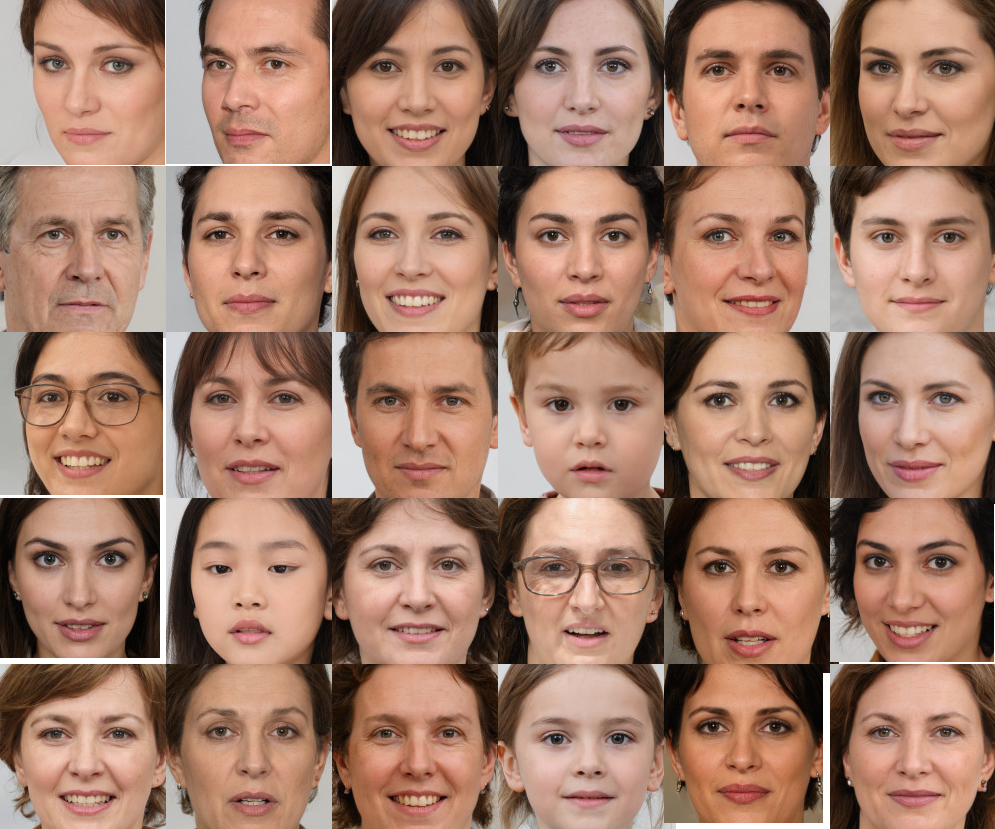

In [15]:
# Método para extraer porcion de una imagen
def slice_image(img, coordinates, dimensions):
  width = img.size[0]
  height = img.size[1]
  img = np.asarray(img)
  x = coordinates[0]
  y = coordinates[1]
  if x >= width or y >= height:
    print('Coordinates out of bounds')
    return
  
  last_x = dimensions[0] + x if dimensions[0] + x < width else width
  last_y = dimensions[1] + y if dimensions[1] + y < height else height

  return Image.fromarray(img[y:last_y, x:last_x])

# Método para generar un grid de imágenes con filas y columnas dinámicas
def create_grid_image(images):
    # Calculo el número de filas y columnas necesarias de manera dinamica
    num_images = len(images)
    num_cols = math.ceil(math.sqrt(num_images))
    num_rows = math.ceil(num_images / num_cols)

    # Calcula el tamaño de cada imagen y el espacio entre ellas
    width, height = images[0].size
    spacing = 1
    total_width = num_cols * width + (num_cols - 1) * spacing
    total_height = num_rows * height + (num_rows - 1) * spacing

    # Crea una imagen en blanco con el tamaño adecuado
    grid_image = Image.new('RGB', (total_width, total_height), color=(255, 255, 255))

    # Pega cada imagen en su posición correspondiente en la imagen final
    x = 0
    y = 0
    for img in images:
        grid_image.paste(img, (x, y))
        x += width + spacing
        if x + width > total_width:
            x = 0
            y += height + spacing

    return grid_image

sliced_faces = []
# Recorremos las caras y las coordenadas de cada imagen
for img, faces in zip(images, faces_coords):
  for face in faces:
    coordinates = (face[0], face[1])
    dimensions = (face[2], face[3])
    sliced_faces.append(slice_image(Image.fromarray(img), coordinates, dimensions))

create_grid_image(sliced_faces)